In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex 
import plotly.graph_objects as go


In [43]:
walmart = pd.read_csv('https://raw.githubusercontent.com/valdirdpg/curso-dnc/master/MODULO-4/mini-projeto2/Walmart.csv')

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)>



```
Super Bowl     12-Feb-10, 11-Feb-11, 10-Feb-12
Labour Day     10-Sep-10, 09-Sep-11, 07-Sep-12
Thanksgiving   26-Nov-10, 25-Nov-11, 23-Nov-12
Christmas      31-Dec-10, 30-Dec-11, 28-Dec-12

**Variável**        **Descrição**
Store              Número da Loja
Date               Semana de Venda
Weekly_Sales       Venda Naquela Semana
Holiday_Flag       Flag se é ou não semana com feriado (1 -
                   Holiday Week 0 - Non-Holiday Week)
Temperature        Temperatura do dia em °F
Fuel_Price         Preço do combustível na região da loja
CPI                Índice de preços ao consumidor
Unemployment       Taxa de desemprego
```




Qual o preço médio de venda semanal por loja?
Qual o atributo que tem maior correlação (positiva ou negativa) com o número de
vendas? (E que faça sentido)
Da loja com maior venda acumulada (soma de vendas de todo o período), quantas
semanas do ano ele ultrapassou a média do período?
Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao
longo do tempo. Ressalte de alguma forma, o período de feriados mencionados
acima.
    Pensando na expansão de uma das lojas, que loja você escolheria e o por que?

In [ ]:
# formatar Weekly_Sales com duas casas decimais
walmart['Weekly_Sales'] = walmart['Weekly_Sales'].apply(lambda x: round(x, 2))

In [ ]:
# formatar Date para datetime
walmart['Date'] = pd.to_datetime(walmart['Date'])


In [ ]:
# verificar se tem valores não preenchidos e as sua médias
# percebo que todos estão preenchidos devido todos os atributos do dataframe terem 
# a mesma quantidade de informação 6435 linhas preenchidas, assim não carece de outros testes
walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
# verificar se tem valores duplicados
# percebo que não tem valores duplicados
walmart.duplicated().sum()


0

In [ ]:
# verificar se tem valores nulos
# percebo que não tem valores nulos
walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

<AxesSubplot: >

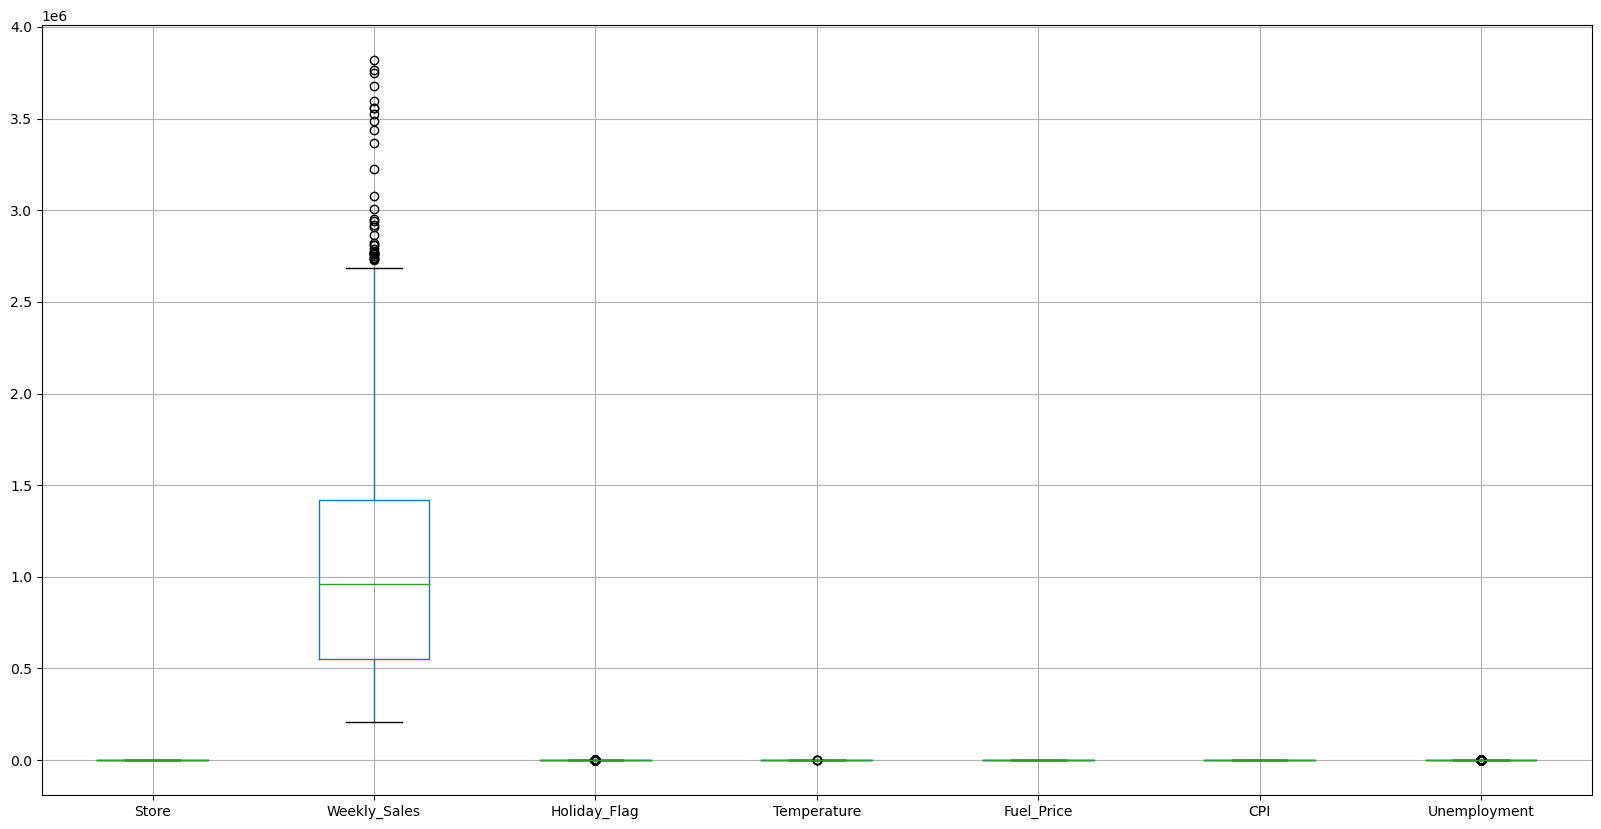

In [ ]:
# verificar se há outliers
# percebo que não tem outliers
plt.figure(figsize=(20, 10))
walmart.boxplot()

In [ ]:
# qual é a média de vendas semanais para cada de loja?
preco_medio = walmart.groupby('Store').agg({'Weekly_Sales':np.mean}).reset_index()
# ordenando as médias de venda do maior para o menor
preco_medio.sort_values(by='Weekly_Sales', ascending=False)




/tmp/ipykernel_38861/1377206008.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



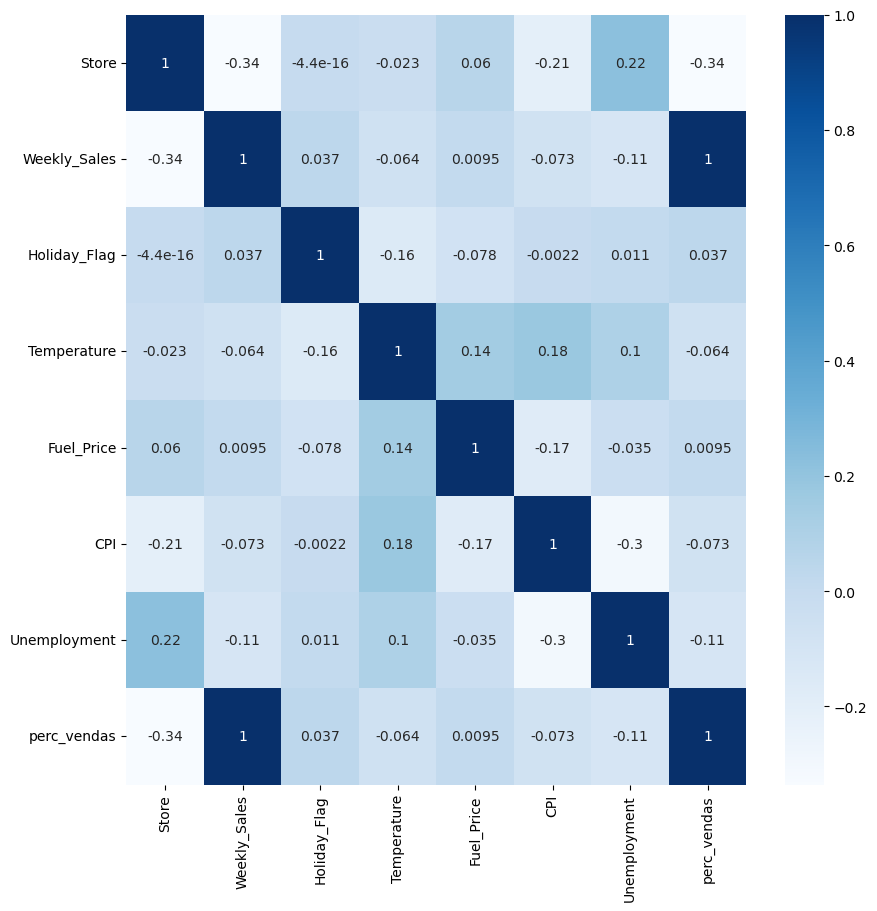

In [ ]:
# plotar um grafico de correlação entre as variáveis

plt.figure(figsize=(10,10))
sns.heatmap(walmart.corr(), annot=True, cmap='Blues')
plt.show()

In [ ]:
# tirar o percentual de vendas de cada loja
# what is the percentage of sales for each store type?
# qual é a porcentagem da medi de vendas para cada tipo de loja?
preco_medio['percentual'] = preco_medio['Weekly_Sales'] / preco_medio['Weekly_Sales'].sum() * 100
preco_medio.sort_values(by='percentual', ascending=False)

,Store,Weekly_Sales,percentual
19,20,2.107677e+06,4.473623
3,4,2.094713e+06,4.446107
13,14,2.020978e+06,4.289602
12,13,2.003620e+06,4.252759
1,2,1.925751e+06,4.087479
9,10,1.899425e+06,4.031600
26,27,1.775216e+06,3.767963
5,6,1.564728e+06,3.321194
0,1,1.555264e+06,3.301107
38,39,1.450668e+06,3.079098


In [56]:
# variação percentual nas vendas em relação ao ano anterior para cada loja
# what is the percentage change in sales for each store type?
# qual é a variação percentual nas vendas em relação ao ano anterior para cada loja?
preco_medio['variação'] = preco_medio['Weekly_Sales'].pct_change() 
preco_medio.sort_values(by='variação', ascending=False)


,Store,Weekly_Sales,percentual,variação
3,4,2.094713e+06,4.446107,4.201614
5,6,1.564728e+06,3.321194,3.920346
38,39,1.450668e+06,3.079098,2.760822
33,34,9.667816e+05,2.052030,2.720370
9,10,1.899425e+06,4.031600,2.491714
30,31,1.395901e+06,2.962853,2.182778
44,45,7.859814e+05,1.668275,1.596150
12,13,2.003620e+06,4.252759,0.985745
26,27,1.775216e+06,3.767963,0.770062
16,17,8.935814e+05,1.896660,0.720915


In [57]:
# grafico de linha para mostrar a variação percentual nas vendas em relação ao ano anterior para cada loja
# what is the percentage change in sales for each store type?
# qual é a variação percentual nas vendas em relação ao ano anterior para cada loja?
fig = go.Figure()
fig.add_trace(go.Scatter(x=preco_medio['Store'], y=preco_medio['variação'], mode='lines+markers', name='variação'))
fig.update_layout(title='Variação percentual nas vendas em relação ao ano anterior para cada loja', xaxis_title='Store', yaxis_title='variação')
fig.show()

In [ ]:
# Which attribute has the highest correlation (positive or negative) with the number of sales? (And that makes sense) sales?
# Qual atributo tem a maior correlação (positiva ou negativa) com o número de vendas? (E que faz sentido) vendas?
# correlação entre as variáveis
walmart.corr()



/tmp/ipykernel_38861/1650718013.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  walmart.corr()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [ ]:
# From the store with the highest cumulative sales (sum of sales for the entire period), how many weeks of the year did it exceed the average for the period?
# Da loja com as vendas acumuladas mais altas (soma das vendas para todo o período), quantas semanas do ano ela excedeu a média para o período?
# agrupando por loja e somando as vendas
soma_venda_periodo = walmart.groupby('Store').agg({'Weekly_Sales':np.sum}).reset_index()
soma = soma_venda_periodo.sort_values(by='Weekly_Sales', ascending=False)
# pegando a loja com as 10 maior venda
top10_venda_acumulada = soma.head(10)

In [ ]:
# plotar grafico de histograma com as vendas acumulçadas por loja
# plt.figure(figsize=(20, 20))
fig = ex.histogram(top10_venda_acumulada , x='Weekly_Sales', color='Store', title='Vendas acumuladas por loja')
fig.show()



In [ ]:

# a loja com maior venda acumulada é a 20
# filtrando a loja 20
loja20 = walmart[walmart['Store'] == 20]
# calculando a média de vendas semanais
media_venda_semanal = loja20['Weekly_Sales'].mean()
# calculando a quantidade de semanas que a loja 20 teve vendas acima da média
loja20[loja20['Weekly_Sales'] > media_venda_semanal].count()
# a loja 20 teve 52 semanas com vendas acima da média
# exibir Weeks com vendas acima da média
loja20[loja20['Weekly_Sales'] > media_venda_semanal]
# exibir Weeks com vendas abaixo da média
loja20[loja20['Weekly_Sales'] < media_venda_semanal]
# exibir Weeks com vendas iguais a média
loja20[loja20['Weekly_Sales'] == media_venda_semanal]
# arreranjar os dados para plotar o gráfico
loja20 = loja20.sort_values(by='Date')
# plotar o gráfico
fig = ex.line(loja20, x='Date', y='Weekly_Sales', title='Vendas por semana da loja 20 no período de 2010 a 2012')
fig.show()


In [ ]:
# Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo. Ressalte de alguma forma, o período de feriados mencionados
# Make a graph with the maximum, minimum and average sales of all stores over time. Highlight in some way, the holiday period mentioned
# agrupando por data e calculando a média, máximo e mínimo de vendas
vendas_por_data = walmart.groupby(['Date', 'Store']).agg({'Weekly_Sales': [np.mean, np.max, np.min]}).reset_index()
# renomeando as colunas
vendas_por_data.columns = ['Date','Store', 'Weekly_Sales_mean', 'Weekly_Sales_max', 'Weekly_Sales_min']

In [ ]:
vendas_mm_150 = vendas_por_data.sort_values(by=['Weekly_Sales_mean', 'Weekly_Sales_max'], ascending=True).head(150)

In [ ]:
vendas_mm_150

,Date,Store,Weekly_Sales_mean,Weekly_Sales_max,Weekly_Sales_min
617,03-12-2010,33,209986.25,209986.25,209986.25
6107,29-10-2010,33,213538.32,213538.32,213538.32
6332,30-12-2011,33,215359.21,215359.21,215359.21
6422,31-12-2010,33,219804.85,219804.85,219804.85
392,02-12-2011,33,220060.35,220060.35,220060.35
...,...,...,...,...,...
3598,17-12-2010,44,278646.35,278646.35,278646.35
5764,28-01-2011,5,279088.39,279088.39,279088.39
5837,28-05-2010,33,279246.33,279246.33,279246.33
3553,17-09-2010,44,279364.13,279364.13,279364.13


In [ ]:
w20 = walmart[walmart['Store'] == 20]
w33 = walmart[walmart['Store'] == 33]
print(w20.describe())
print(w33.describe())

       Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
count  143.0  1.430000e+02    143.000000   143.000000  143.000000  143.000000   
mean    20.0  2.107677e+06      0.069930    55.451399    3.417608  209.038131   
std      0.0  2.759006e+05      0.255926    16.543846    0.443029    4.176736   
min     20.0  1.761017e+06      0.000000    20.390000    2.699000  203.610178   
25%     20.0  1.950866e+06      0.000000    42.865000    2.921000  204.774194   
50%     20.0  2.053165e+06      0.000000    58.650000    3.541000  208.556714   
75%     20.0  2.155186e+06      0.000000    70.330000    3.809000  213.372861   
max     20.0  3.766687e+06      1.000000    79.200000    4.066000  216.151590   

       Unemployment  
count    143.000000  
mean       7.371413  
std        0.305069  
min        6.961000  
25%        7.139000  
50%        7.287000  
75%        7.484000  
max        8.187000  
       Store   Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
co

In [ ]:
loja20 = walmart[walmart['Store'] == 20]
# calculando a média de vendas semanais
media_venda_semanal = loja20['Weekly_Sales'].mean()
# calculando a quantidade de semanas que a loja 20 teve vendas acima da média
loja20[loja20['Weekly_Sales'] > media_venda_semanal].count()
# a loja 20 teve 52 semanas com vendas acima da média
# exibir Weeks com vendas acima da média
loja20[loja20['Weekly_Sales'] > media_venda_semanal]
# exibir Weeks com vendas abaixo da média
loja20[loja20['Weekly_Sales'] < media_venda_semanal]
# exibir Weeks com vendas iguais a média
loja20[loja20['Weekly_Sales'] == media_venda_semanal]
# arreranjar os dados para plotar o gráfico
loja20 = loja20.sort_values(by='Date')

In [ ]:
media_venda_semanal

2107676.8703496507

In [ ]:
loja33 = walmart[walmart['Store'] == 33]
# calculando a média de vendas semanais
media_venda_semanal = loja33['Weekly_Sales'].mean()
# calculando a quantidade de semanas que a loja 20 teve vendas acima da média
loja33[loja33['Weekly_Sales'] > media_venda_semanal].count()
# a loja 20 teve 67 semanas com vendas acima da média
# exibir Weeks com vendas acima da média
loja33[loja33['Weekly_Sales'] > media_venda_semanal]
# exibir Weeks com vendas abaixo da média
loja33[loja33['Weekly_Sales'] < media_venda_semanal]
# exibir Weeks com vendas iguais a média
loja33[loja33['Weekly_Sales'] == media_venda_semanal]
# arreranjar os dados para plotar o gráfico
loja33 = loja33.sort_values(by='Date')
media_venda_semanal

259861.692027972

In [ ]:
vendas_por_data = walmart.groupby(['Date']).agg({'Weekly_Sales': [np.mean, np.max, np.min]}).reset_index()
# renomeando as colunas
vendas_por_data.columns = ['Date', 'Weekly_Sales_mean', 'Weekly_Sales_max', 'Weekly_Sales_min']
vendas_por_data = vendas_por_data.sort_values(by='Date')
# plotar o gráfico
fig = ex.line(vendas_por_data, x='Date', y=['Weekly_Sales_mean', 'Weekly_Sales_max', 'Weekly_Sales_min'], title='Vendas máximas, mínimas e médias de todas as lojas ao longo do tempo')
fig.update_layout(xaxis_title='Data', yaxis_title='Valor em $')
fig.show()

In [ ]:
# Pensando na expansão de uma das lojas, que loja você escolheria e o por que?
# Thinking about the expansion of one of the stores, which store would you choose and why?
# agrupando por loja e calculando a média, máximo e mínimo de vendas
vendas_por_loja = walmart.groupby(['Store']).agg({'Weekly_Sales': [np.mean, np.max, np.min]}).reset_index()
# renomeando as colunas
vendas_por_loja.columns = ['Store', 'Weekly_Sales_mean', 'Weekly_Sales_max', 'Weekly_Sales_min']
# ordenando as médias de venda do maior para o menor
vendas_por_loja.sort_values(by='Weekly_Sales_mean', ascending=False)


In [ ]:
# plotar um gráfico de barras com a média de vendas por loja
fig = ex.bar(vendas_por_loja, x='Store', y='Weekly_Sales_mean', title='Média de vendas por loja')
fig.update_layout(xaxis_title='Loja', yaxis_title='Valor em $') 
fig.show()

In [55]:
# plotar um gráfico de barras com a média de vendas por loja somente de 2010
# filtrar os dados de 2010 e agrupar por loja e calcular a média de vendas


walmart['Year'] = pd.DatetimeIndex(walmart['Date']).year
vendas_por_loja_2010 = walmart[walmart['Year'] == 2012].groupby(['Store']).agg({'Weekly_Sales': [np.mean]}).reset_index()
# renomeando as colunas
vendas_por_loja_2010.columns = ['Store', 'Weekly_Sales_mean']
fig = ex.bar(vendas_por_loja_2010, x='Store', y='Weekly_Sales_mean', title='Média de vendas por loja em 2010')
fig.update_layout(xaxis_title='Loja', yaxis_title='Valor em $')
fig.show()
walmart['Year'] 


0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
6430    2012
6431    2012
6432    2012
6433    2012
6434    2012
Name: Year, Length: 6435, dtype: int64

In [ ]:
# plotar um gráfico vendas_por_loja  com o max e min de vendas por loja e as barras coloridas lado a lado
# barras coloridas lado a lado max e min ao inves de em cima
fig = ex.bar(vendas_por_loja, x='Store', y=['Weekly_Sales_max', 'Weekly_Sales_min'], title='Máximo e mínimo de vendas por loja')
fig.update_layout(xaxis_title='Loja', yaxis_title='Valor em $')
fig.show()

In [ ]:
loja_20 = walmart[walmart['Store'] == 20]
loja_20 = loja_20.sort_values(by='Date')
# plotar o gráfico
fig = ex.line(loja_20, x='Date', y='Weekly_Sales', title='Vendas por semana da loja 20 no período de 2010 a 2012')
fig.show()


In [ ]:
loja_20.head(50)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2777,20,01-04-2011,1927993.09,0,32.43,3.638,207.882304,7.287
2838,20,01-06-2012,2143126.59,0,73.67,3.742,214.551328,7.139
2790,20,01-07-2011,2053165.41,0,69.66,3.748,208.334643,7.274
2751,20,01-10-2010,1933719.21,0,61.08,2.707,204.885097,7.484
2825,20,02-03-2012,2148822.76,0,39.98,3.816,213.671813,6.961
2725,20,02-04-2010,2405395.22,0,51.00,2.850,204.025284,7.856
2738,20,02-07-2010,2143676.77,0,70.10,2.815,204.465056,7.527
2799,20,02-09-2011,2141765.98,0,70.82,3.703,208.962516,7.274
2812,20,02-12-2011,2298776.83,0,46.32,3.452,211.639431,7.082
2821,20,03-02-2012,2203523.20,0,39.93,3.617,213.023622,6.961


In [ ]:
# Flag se é ou não semana com feriado (1 -Holiday Week 0 - Non-Holiday Week)
# Flag if it is or is not a holiday week (1 -Holiday Week 0 - Non-Holiday Week)
# criar uma coluna com o valor 1 para as semanas com feriado e 0 para as semanas sem feriado
loja_20['Holiday_Flag'] = np.where(loja_20['Holiday_Flag'] == True, 1, 0)
# plotar o gráfico
fig = ex.line(loja_20, x='Date', y='Weekly_Sales', color='Holiday_Flag', title='Vendas por semana da loja 20 nas semanas com e sem feriado')
fig.show()

In [ ]:
# plotar o gráficode linha com as medias de vendas por semana de todas as lojas considerando o Holiday_Flag
# plotar o gráfico de linha com as medias de vendas por semana de todas as lojas considerando o Holiday_Flag
vendas_por_data = walmart.groupby(['Date', 'Holiday_Flag']).agg({'Weekly_Sales': [np.mean]}).reset_index()
# renomeando as colunas
vendas_por_data.columns = ['Date', 'Holiday_Flag', 'Weekly_Sales_mean']
# ordenando as médias de venda do maior para o menor
vendas_por_data = vendas_por_data.sort_values(by='Date')
# plotar o gráfico
fig = ex.line(vendas_por_data, x='Date', y='Weekly_Sales_mean', color='Holiday_Flag', title='Média de vendas por semana de todas as lojas considerando o Holiday_Flag')
fig.show()
